In [1]:
#data sourcing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stast
import seaborn as sns
filename = 'Marketing_Analysis.csv'
df=pd.read_csv(filename)
df.head()


C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
#data cleaning, gồm:
#Missing Values
#Incorrect Format
#Incorrect Headers
#Anomalies/Outliers

In [8]:
#incorrect headers
#tiêu đề 2 hàng đầu không khớp -> skip, load lại và đọc dữ liệu từ hàng thứ 3
df= pd.read_csv(filename, skiprows = 2)
df.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stast
import seaborn as sns

In [4]:
#customerid có thể lấy theo chỉ số -> cắt khỏi bảng
df = df.drop(['customerid'], axis = 1)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#cột jobedu gồm 2 trường thông tin -> tách cột
df['job']=df['jobedu'].apply(lambda x: x.split(','))
df['education']= df["jobedu"].apply(lambda x: x.split(","))
df

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,"[management, tertiary]","[management, tertiary]"
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,"[technician, secondary]","[technician, secondary]"
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,"[entrepreneur, secondary]","[entrepreneur, secondary]"
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,"[blue-collar, unknown]","[blue-collar, unknown]"
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,"[unknown, unknown]","[unknown, unknown]"
5,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,"[management, tertiary]","[management, tertiary]"
6,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,"[management, tertiary]","[management, tertiary]"
7,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,"[entrepreneur, tertiary]","[entrepreneur, tertiary]"
8,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,"[retired, primary]","[retired, primary]"
9,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,"[technician, secondary]","[technician, secondary]"


In [9]:
#cột jobedu gồm 2 trường thông tin -> tách cột
df['job']=df['jobedu'].apply(lambda x: x.split(',')[0])
df['education']= df["jobedu"].apply(lambda x: x.split(",")[1])
# xóa cột jobedu
df.drop('jobedu', axis = 1, inplace = True)
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [6]:
#missing data -> kiểm tra null
df.info()
#các cột null age, month, response 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
age          45191 non-null float64
salary       45211 non-null int64
balance      45211 non-null int64
marital      45211 non-null object
jobedu       45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45161 non-null object
duration     45211 non-null object
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45181 non-null object
job          45211 non-null object
education    45211 non-null object
dtypes: float64(1), int64(6), object(13)
memory usage: 6.9+ MB


In [7]:
#số lượng null
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [12]:
#xóa các giá trị null tại cột age
df = df[~df.age.isnull()].copy()
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [13]:
#gán giá trị cho month
month_mode = df.month.mode()[0]
df.month.fillna(month_mode, inplace = True)
df.month.isnull().sum()

0

In [14]:
#month là dạng object-> tìm mode và thay giá trị null bằng giá trị khác
# Tìm mode
month_mode = df.month.mode()[0]
## Mode of month is
#'may, 2017'
#gán giá trị mới (cùng mode) cho các giá trị null
df.month.fillna(month_mode, inplace = True)
df.month.isnull().sum()

0

In [15]:
#xử lý null cột reponse. vì là cột cần dùng để phân tích. 
#Nếu gán giá trị khác vào thì sẽ ảnh hưởng đến phân tích
# tốt hơn là loại bỏ các giá trị bị thiếu khỏi cột
df = df [~ df.response.isnull ()].copy ()
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [16]:
#Xử lý giá trị ngoại lệ
#ngoại lai đơn biến (ngoại lai của 1 biến đơn lẻ, 1 cột)
#ngoại lại đa biến (ngoại lai khi phân tích nhiều biến,  lệch khỏi xu hướng phân phối chuẩn dữ liệu)

In [17]:
#tiêu chuẩn hóa các giá trị (phải cùng 1 dạng)

In [18]:
#vì marital, job, education là dạng catergory -> xem thống kê chi tiết từng cột
#b1: job là đơn biến không theo thứ tự phân loại
count_job = df.job.value_counts()
count_job


blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: job, dtype: int64

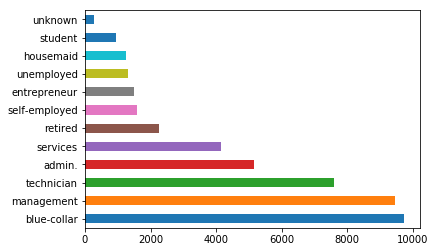

In [19]:
#vẽ đồ thị xem phân bố của từng giá trị (bar matplotlib)
count_job.plot.barh()
plt.show()

In [20]:
#đơn biến có thứ tự phân loại: có thứ tự xếp hạng tự nhiên
#ví dụ: Tháng: Tháng 1, tháng 2, tháng 3 ……, Trình độ học vấn: Tiểu học, Trung học, ……
#b2: education là biến theo thứ tự phân loại 
count_education= df.education.value_counts()
count_education

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

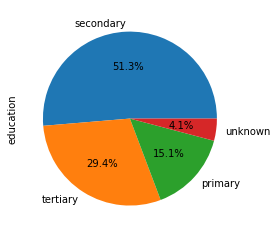

In [21]:
#vẽ đồ thị pie from mattplotlib
count_education.plot.pie( autopct='%1.1f%%')

In [22]:
#xét cột salary: là cột số
#muốn phân tích hàm đơn biến dạng số 
#sử dụng hàm 
df.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [23]:
#PHÂN TÍCH ĐA BIẾN


In [24]:
# Numeric-Numeric Analysis
# 3 dạng đồ thị thường dùng: scatter, Pair Plot, Correlation Matrix

In [25]:
df.corr()
#nhận xét: 

,age,salary,balance,day,campaign,pdays,previous
age,1.000000,0.024513,0.097710,-0.008972,0.004814,-0.023805,0.001352
salary,0.024513,1.000000,0.055489,0.027774,0.015010,-0.015077,0.014560
balance,0.097710,0.055489,1.000000,0.004446,-0.014430,0.003470,0.016720
day,-0.008972,0.027774,0.004446,1.000000,0.162500,-0.093120,-0.051693
campaign,0.004814,0.015010,-0.014430,0.162500,1.000000,-0.088613,-0.032791
pdays,-0.023805,-0.015077,0.003470,-0.093120,-0.088613,1.000000,0.454201
previous,0.001352,0.014560,0.016720,-0.051693,-0.032791,0.454201,1.000000


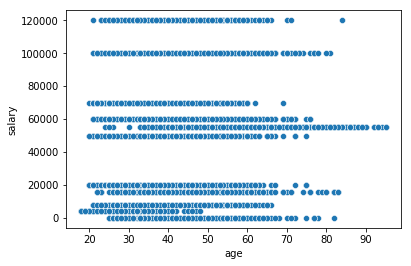

In [26]:
#vẽ scatter giữa: age, salary, balance
sns.scatterplot(x = 'age', y = 'salary', data=df)
plt.show()

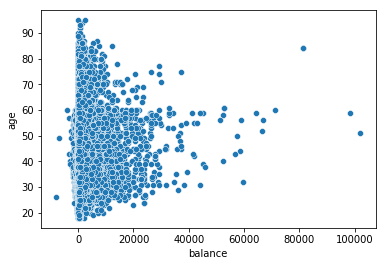

In [27]:
sns.scatterplot(x = 'balance', y = 'age', data=df)
plt.show()

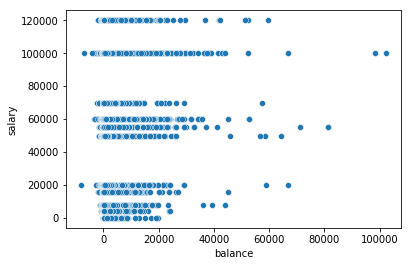

In [28]:
sns.scatterplot(x = 'balance', y = 'salary', data=df)

plt.show()

<Figure size 2160x1080 with 0 Axes>

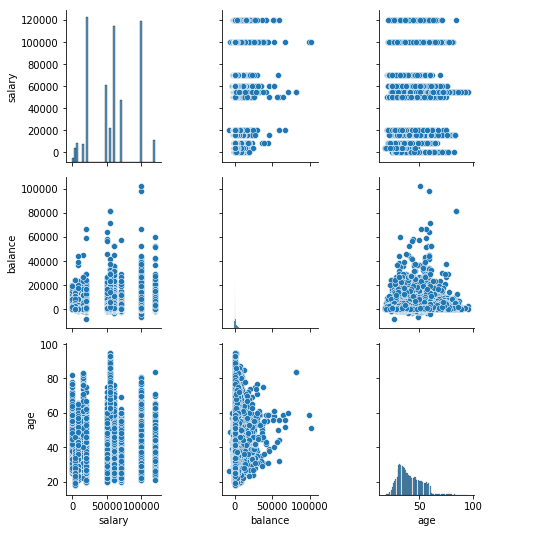

In [29]:
#dùng pairplot cho cả 3 cột
plt.figure(figsize = (30,15))
sns.pairplot(data = df, vars=['salary','balance','age'])
plt.show()

In [30]:
#Giờ quan sát corr cho cả 3 dataframe này
df[['age','balance','salary']].corr()

,age,balance,salary
age,1.000000,0.097710,0.024513
balance,0.097710,1.000000,0.055489
salary,0.024513,0.055489,1.000000


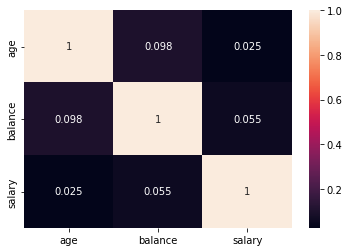

In [31]:
#heatmap cho corr
sns.heatmap(df[['age','balance','salary']].corr(), annot =True)

In [32]:
df.corr()

,age,salary,balance,day,campaign,pdays,previous
age,1.000000,0.024513,0.097710,-0.008972,0.004814,-0.023805,0.001352
salary,0.024513,1.000000,0.055489,0.027774,0.015010,-0.015077,0.014560
balance,0.097710,0.055489,1.000000,0.004446,-0.014430,0.003470,0.016720
day,-0.008972,0.027774,0.004446,1.000000,0.162500,-0.093120,-0.051693
campaign,0.004814,0.015010,-0.014430,0.162500,1.000000,-0.088613,-0.032791
pdays,-0.023805,-0.015077,0.003470,-0.093120,-0.088613,1.000000,0.454201
previous,0.001352,0.014560,0.016720,-0.051693,-0.032791,0.454201,1.000000


In [13]:
#nhận xét, không thấy sự khác biệt đáng kể ở đây
#phải xét đến các cột str
# chuyển response thành số
response_category = {"yes":0, "no":1}
df = df.replace(response_category)
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",0,1,0,1,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,1.0
1,2,44.0,60000,29,single,"technician,secondary",0,1,0,1,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,1.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",0,1,0,0,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,1.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",1,1,0,1,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,1.0
4,5,33.0,0,1,single,"unknown,unknown",1,1,1,1,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,1.0
5,6,35.0,100000,231,married,"management,tertiary",0,1,0,1,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,1.0
6,7,28.0,100000,447,single,"management,tertiary",1,1,0,0,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,1.0
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",1,0,0,1,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,1.0
8,9,58.0,55000,121,married,"retired,primary",0,1,0,1,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,1.0
9,10,43.0,60000,593,single,"technician,secondary",0,1,0,1,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,1.0


In [34]:
df.corr()

,age,salary,balance,targeted,default,housing,loan,day,campaign,pdays,previous,response
age,1.000000,0.024513,0.097710,-0.113230,0.018052,0.185445,0.015728,-0.008972,0.004814,-0.023805,0.001352,-0.025076
salary,0.024513,1.000000,0.055489,0.222853,-0.006546,0.048967,-0.017527,0.027774,0.015010,-0.015077,0.014560,-0.020146
balance,0.097710,0.055489,1.000000,0.040688,0.066635,0.068707,0.084314,0.004446,-0.014430,0.003470,0.016720,-0.052809
targeted,-0.113230,0.222853,0.040688,1.000000,0.008750,0.075614,0.066422,0.012969,0.002946,0.004256,0.013150,-0.068900
default,0.018052,-0.006546,0.066635,0.008750,1.000000,-0.005827,0.077031,-0.009181,-0.016694,0.029939,0.018290,-0.022398
housing,0.185445,0.048967,0.068707,0.075614,-0.005827,1.000000,0.041123,0.028066,0.023794,-0.124313,-0.037033,-0.139220
loan,0.015728,-0.017527,0.084314,0.066422,0.077031,0.041123,1.000000,-0.011349,-0.010095,0.022951,0.011244,-0.068003
day,-0.008972,0.027774,0.004446,0.012969,-0.009181,0.028066,-0.011349,1.000000,0.162500,-0.093120,-0.051693,0.028365
campaign,0.004814,0.015010,-0.014430,0.002946,-0.016694,0.023794,-0.010095,0.162500,1.000000,-0.088613,-0.032791,0.073120
pdays,-0.023805,-0.015077,0.003470,0.004256,0.029939,-0.124313,0.022951,-0.093120,-0.088613,1.000000,0.454201,-0.103689


In [14]:
df.describe()

,customerid,age,salary,balance,targeted,default,housing,loan,day,campaign,pdays,previous,response
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45181.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,0.179602,0.981973,0.444162,0.839774,15.806419,2.763841,40.197828,0.580323,0.882982
std,13051.435847,10.619198,32085.718415,3044.765829,0.383860,0.133049,0.496878,0.366820,8.322476,3.098021,100.128746,2.303441,0.321446
min,1.000000,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,0.000000,1.000000,0.000000,1.000000,8.000000,1.000000,-1.000000,0.000000,1.000000
50%,22606.000000,39.000000,60000.000000,448.000000,0.000000,1.000000,0.000000,1.000000,16.000000,2.000000,-1.000000,0.000000,1.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,0.000000,1.000000,1.000000,1.000000,21.000000,3.000000,-1.000000,0.000000,1.000000
max,45211.000000,95.000000,120000.000000,102127.000000,1.000000,1.000000,1.000000,1.000000,31.000000,63.000000,871.000000,275.000000,1.000000


In [36]:
#phân tích dựa vào mean và median
df.groupby('response')['salary'].mean()

response
0    58780.510880
1    56769.510482
Name: salary, dtype: float64

In [37]:
df.groupby('response')['salary'].median()

response
0    60000
1    60000
Name: salary, dtype: int64

In [38]:
#nhận xét không có sự khác biệt đáng kể giữa tỷ lệ trả lời yes, no theo salary

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


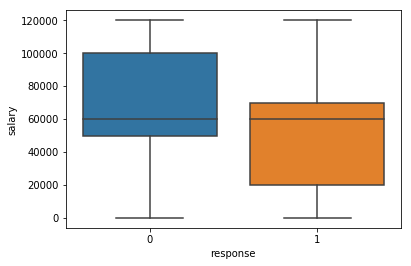

In [39]:
#kiểm tra bằng boxplot
sns.boxplot(df.response, df.salary)
plt.show()
#nhận xét: những người phản hồi yes thường có mức lương cao hơn

In [40]:
df.response.value_counts()

1    39876
0     5285
Name: response, dtype: int64

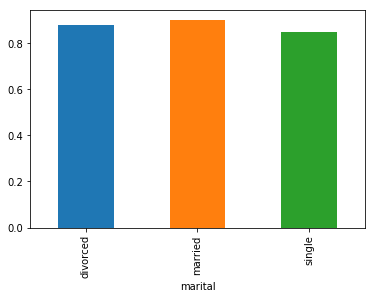

In [41]:
#sự tỷ lệ phản hồi ở những tình trạng hôn nhân khác nhau
df.groupby('marital')['response'].mean().plot.bar()
plt.show()

In [ ]:
# nhận xét

In [ ]:
# những người đã kết hôn có trình độ tiểu học ít có khả năng phản hồi YEs 
#những người độc thân có trình độ đại học có nhiều khả năng phản hồi Yes

In [ ]:
%age	salary	balance	targeted	default	housing	loan	day	campaign	pdays	previous	response

In [18]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",0,1,0,1,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,1.0
1,2,44.0,60000,29,single,"technician,secondary",0,1,0,1,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,1.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",0,1,0,0,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,1.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",1,1,0,1,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,1.0
4,5,33.0,0,1,single,"unknown,unknown",1,1,1,1,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,1.0


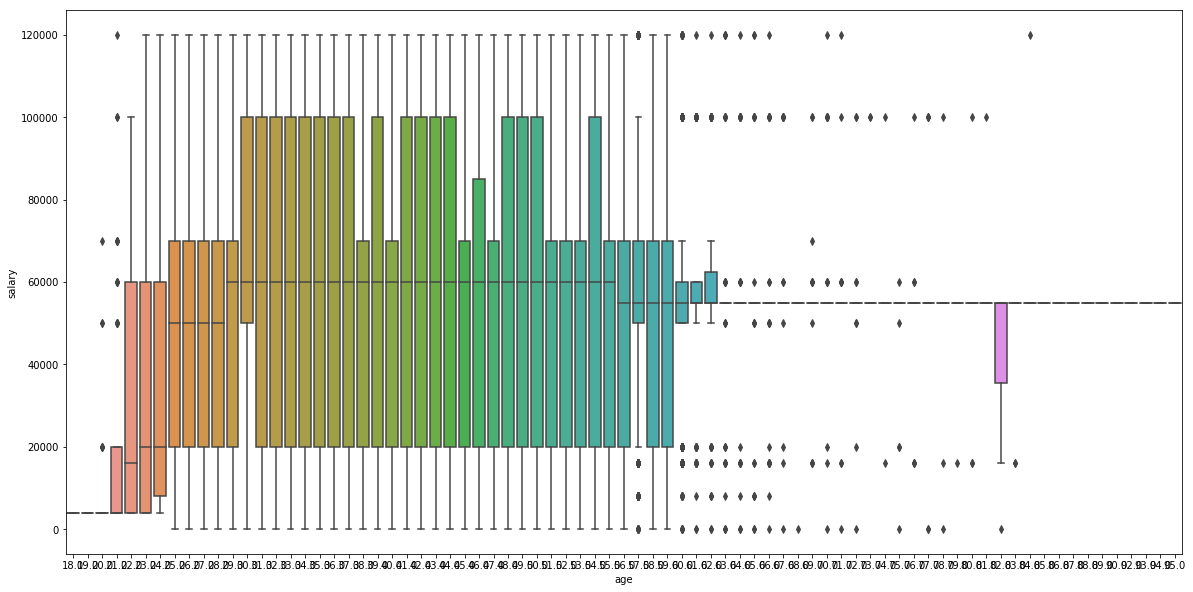

In [19]:
#tìm outlinear, dùng 
plt.figure(figsize= (20,10))
sns.boxplot(x= df['age'], y= df['salary'])
plt.show()

In [ ]:
#Mahalanobis Distance (MD) khoarng cách giữa điểm đó tới phân phối

In [ ]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
#https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642
#https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17
